Link to the github repository: https://github.com/kanon-saint/CMSC-197/tree/main

### Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

### Load `Advertising.csv` dataset

In [4]:
# Load the dataset
data = pd.read_csv('data/Advertising.csv', index_col=0)
print("Size of the data:", data.shape)

data.head()

Size of the data: (200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Standardize each column of the dataset

In [6]:
# Initialize the scaler and fit-transform the feature data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)

# Create a DataFrame
standardized_data = pd.DataFrame(standardized_data, columns=['TV', 'Radio', 'Newspaper', 'Sales'])

standardized_data.head()

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


### Insert intercept

In [8]:
# Insert an Intercept column filled with 1s at the beginning of the standardized_data DataFrame
standardized_data.insert(0, 'Intercept', 1)

standardized_data.head()

,Intercept,TV,Radio,Newspaper,Sales
0,1,0.969852,0.981522,1.778945,1.552053
1,1,-1.197376,1.082808,0.669579,-0.696046
2,1,-1.516155,1.528463,1.783549,-0.907406
3,1,0.052050,1.217855,1.286405,0.860330
4,1,0.394182,-0.841614,1.281802,-0.215683


In [9]:
# Assign x and y
x = standardized_data.drop(columns=['Sales'])
y = standardized_data['Sales']

### Split the data

In [11]:
# Split the data into training (85%) and testing (15%) sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, train_size=0.85, test_size=0.15)

print(f"Training set shape: {x_train.shape}, {y_train.shape}")
print(f"Testing set shape: {x_test.shape}, {y_test.shape}")

Training set shape: (170, 4), (170,)
Testing set shape: (30, 4), (30,)


### Gradient Descent Functions

In [13]:
def initialize_weights():
    return np.zeros(4)

In [14]:
def predict(x, weights):
    predict = np.dot(x, weights)
    return predict

In [15]:
def compute_cost(y, prediction):
    m = len(y)
    cost = (1 / (2 * m)) * np.sum((prediction - y) ** 2)
    return cost

In [16]:
def compute_gradient(x, y, weights):
    m = len(y)
    prediction = predict (x, weights)
    error = prediction - y
    gradients = (1 / m) * np.dot(x.T, error)
    return gradients

In [17]:
def update_weights(weights, gradient, learning_rate):
    updated_weights = weights - learning_rate * gradient
    return updated_weights

In [18]:
def grad_descent(x, y, learning_rate, num_iterations):
    weights = initialize_weights()
    cost_history = []

    for i in range(num_iterations):
        # Predict the values
        prediction = predict(x, weights)

        # Compute the cost
        cost = compute_cost(y, prediction)
        cost_history.append(cost)

        # Compute the gradient
        gradient = compute_gradient(x, y, weights)

        # Update the weights
        weights = update_weights(weights, gradient, learning_rate)

    return weights, cost_history

In [19]:
def plot_cost(cost_history, learning_rate):
    plt.figure(figsize=(16, 8))
    plt.scatter(
        x = range(len(cost_history)),
        y = cost_history
    )
    plt.title(f'Cost vs Iterations (Learning Rate = {learning_rate})', fontsize=14)
    plt.xlabel('Iterations', fontsize=12)
    plt.ylabel('Cost', fontsize=12)
    plt.grid(True)
    plt.show()

### Gradient Descent

In [21]:
# Parameters
learning_rate = 0.01  # Example learning rate
num_iterations = 500  # Number of iterations

# Perform gradient descent
weights, cost_history = grad_descent(x_train, y_train, learning_rate, num_iterations)

# Print final weights and cost
print("Final weights after gradient descent:", weights)
print("Final cost after gradient descent:", cost_history[-1])

Final weights after gradient descent: [0.00130449 0.73293831 0.52473593 0.01644986]
Final cost after gradient descent: 0.051439275873279955


### Plot

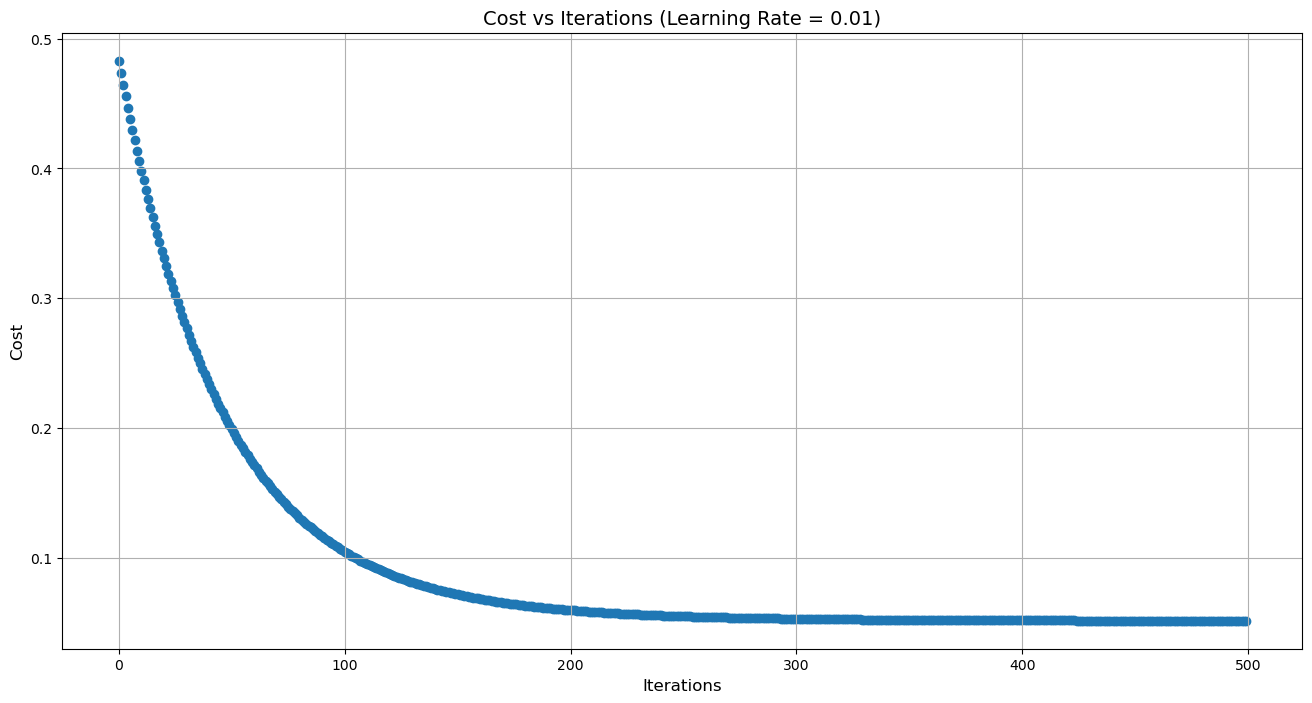

In [23]:
plot_cost(cost_history, learning_rate)

### Predict y for train and test set and calculate their cost

In [25]:
# Predict y for the training set
y_train_pred = predict(x_train.to_numpy(), weights)

# Calculate cost for the training set
train_cost = compute_cost(y_train, y_train_pred)
print("Training Cost:", train_cost)

# Predict y for the test set
y_test_pred = predict(x_test.to_numpy(), weights)

# Calculate cost for the test set
test_cost = compute_cost(y_test, y_test_pred)
print("Test Cost:", test_cost)

# Display predictions and actual values for better insight
print("\nTRAIN SET PREDICTIONS vs ACTUAL:")
print("Predicted vs Actual (First 5):")
for pred, actual in zip(y_train_pred[:5], y_train[:5].values):
    print(f"Predicted: {pred}, Actual: {actual}")

print("\nTEST SET PREDICTIONS vs ACTUAL:")
print("Predicted vs Actual (First 5):")
for pred, actual in zip(y_test_pred[:5], y_test[:5].values):
    print(f"Predicted: {pred}, Actual: {actual}")

Training Cost: 0.051437975420200135
Test Cost: 0.053756946518933486

TRAIN SET PREDICTIONS vs ACTUAL:
Predicted vs Actual (First 5):
Predicted: -0.28642473475106606, Actual: -0.6576170643692228
Predicted: -0.7721182714154141, Actual: -0.5231154003638301
Predicted: 1.3934720855381553, Actual: 1.8594855048745509
Predicted: -0.34386280456838636, Actual: -1.0226930095267168
Predicted: 0.8182983958662617, Actual: 0.39918172424457565

TEST SET PREDICTIONS vs ACTUAL:
Predicted vs Actual (First 5):
Predicted: 0.4527254188812738, Actual: 0.5528979116793094
Predicted: 1.2979068718265865, Actual: 1.6096967002931075
Predicted: 1.4376273508410007, Actual: 1.4175514659996897
Predicted: -0.6627734932718478, Actual: -1.2916963375375017
Predicted: 1.5194397746326287, Actual: 2.051630739167969


### Actual vs Predicted

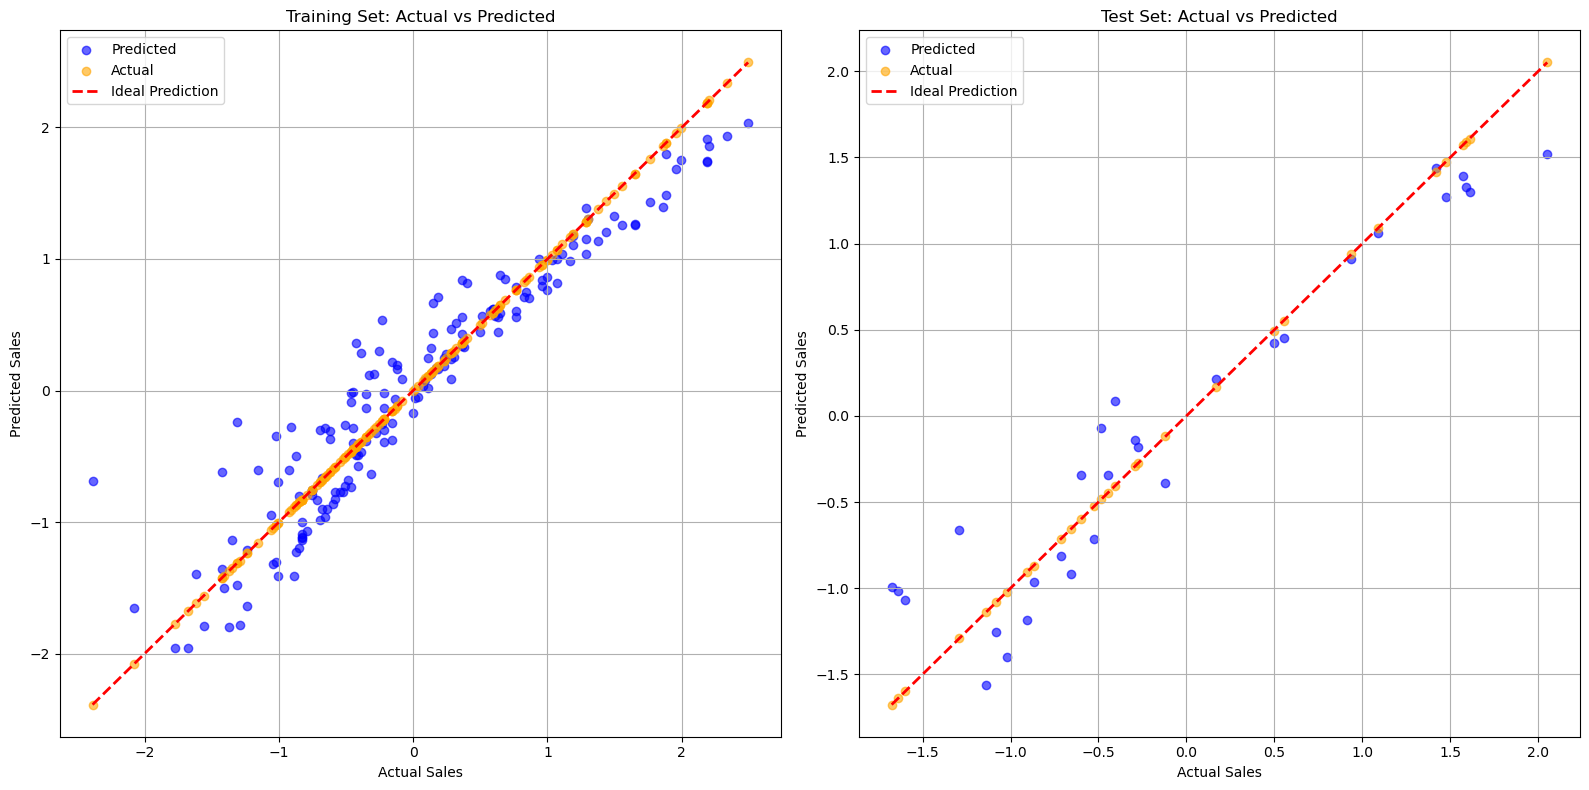

In [27]:
# Plotting Actual vs Predicted for Training Set
plt.figure(figsize=(16, 8))

# Training Set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6, label='Predicted')
plt.scatter(y_train, y_train, color='orange', alpha=0.6, label='Actual')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Ideal Prediction')  # Identity line
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.grid()

# Test Set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6, label='Predicted')
plt.scatter(y_test, y_test, color='orange', alpha=0.6, label='Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Prediction')  # Identity line
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


### MSE for train and test set

In [29]:
# Calculate the MSE for the training set using the compute_cost function
train_predictions = predict(x_train, weights)
train_mse = compute_cost(y_train, train_predictions)
print("Mean Squared Error (MSE) on Training Set:", train_mse)

# Calculate R² for the training set
train_r2 = r2_score(y_train, y_train_pred)
print("R² on Training Set:", train_r2)

# Calculate the MSE for the test set using the compute_cost function
test_predictions = predict(x_test, weights)
test_mse = compute_cost(y_test, test_predictions)
print("Mean Squared Error (MSE) on Test Set:", test_mse)

# Calculate R² for the test set
test_r2 = r2_score(y_test, y_test_pred)
print("R² on Test Set:", test_r2)

Mean Squared Error (MSE) on Training Set: 0.051437975420200135
R² on Training Set: 0.893468649398287
Mean Squared Error (MSE) on Test Set: 0.053756946518933486
R² on Test Set: 0.9092194823810236


### Revert

In [31]:
# Predict sales based on the current weights
pred_sales = predict(standardized_data[['Intercept', 'TV', 'Radio', 'Newspaper']], weights)

# Revert the predicted sales back to the original scale (undo the standardization)
sales_mean, sales_std = data['Sales'].mean(), data['Sales'].std()
pred_sales_original = pred_sales * sales_std + sales_mean

# Reverse the standardization for all other features
original_data = scaler.inverse_transform(standardized_data.drop(columns=['Intercept']))
original_df = pd.DataFrame(original_data, columns=['TV', 'Radio', 'Newspaper', 'Sales'])

# Add the predicted sales in original scale
original_df['Predicted Sales'] = pred_sales_original

# Compute residuals (Actual Sales - Predicted Sales)
original_df['Residuals'] = original_df['Sales'] - original_df['Predicted Sales']

# Display the final DataFrame with actual sales, predicted sales, and residuals
original_df.head()

,TV,Radio,Newspaper,Sales,Predicted Sales,Residuals
0,230.1,37.8,69.2,22.1,20.577973,1.522027
1,44.5,39.3,45.1,10.4,12.472416,-2.072416
2,17.2,45.9,69.3,9.3,12.569100,-3.269100
3,151.5,41.3,58.5,18.5,17.672983,0.827017
4,180.8,10.8,58.4,12.9,13.342542,-0.442542


### Questions

### What are the optimal weights found by your implemented gradient descent? Plug it into the linear model:

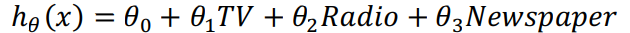

### What are your interpretations regarding the formed linear model?

In [34]:
print("Optimal weights found:", weights)
print(f"Linear model: hΘ(x) = {weights[0]:.4f} + {weights[1]:.4f}*TV + {weights[2]:.4f}*Radio + {weights[3]:.4f}*Newspaper")

Optimal weights found: [0.00130449 0.73293831 0.52473593 0.01644986]
Linear model: hΘ(x) = 0.0013 + 0.7329*TV + 0.5247*Radio + 0.0164*Newspaper


For every unit increase in TV advertising expenditure, sales are expected to increase by 0.7329 units, assuming the other factors (Radio, Newspaper) remain constant.

For every unit increase in Radio advertising expenditure, sales increase by 0.5247 units, assuming TV and Newspaper spend are held constant.

For every unit increase in Newspaper advertising expenditure, sales increase by 0.0164 units.

### Provide a scatter plot of the image below for both the train and test seet. Is there a trend? Provide an r2 score.

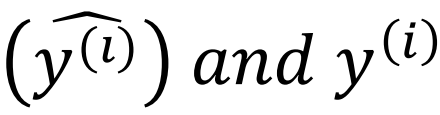

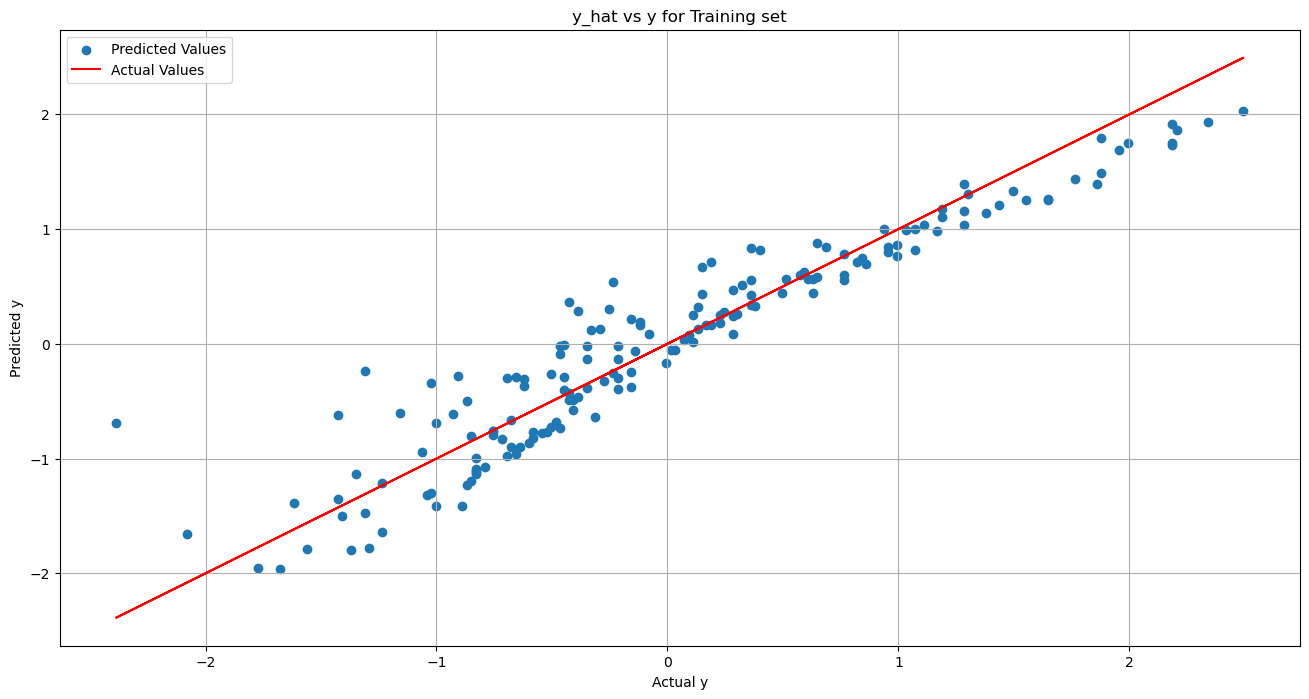

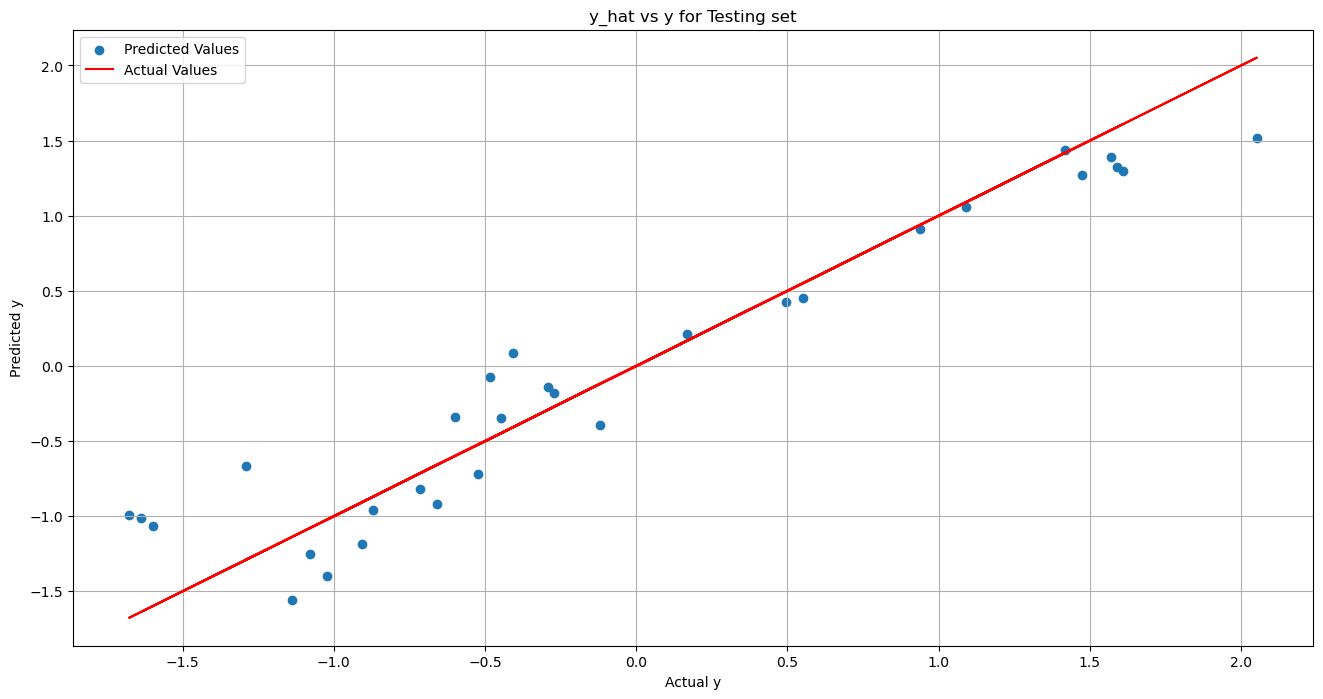

In [37]:
def plot_actual_vs_predicted(y_actual, y_predicted, dataset_type='Training'):
    plt.figure(figsize=(16, 8))
    plt.scatter(y_actual, y_predicted, label='Predicted Values')
    plt.plot(y_actual, y_actual, color='red', label='Actual Values')
    plt.xlabel('Actual y')
    plt.ylabel('Predicted y')
    plt.title(f'y_hat vs y for {dataset_type} set')
    plt.legend()
    plt.grid(True)
    plt.show()

# Predictions for training and testing sets
prediction_train = predict(x_train, weights)
prediction_test = predict(x_test, weights)

# Plot for Training Set
plot_actual_vs_predicted(y_train, prediction_train, dataset_type='Training')

# Plot for Testing Set
plot_actual_vs_predicted(y_test, prediction_test, dataset_type='Testing')

In [38]:
print("R² score of train:", train_r2)
print("R² score of train:", test_r2)

R² score of train: 0.893468649398287
R² score of train: 0.9092194823810236


### What happens to the error, r2, and cost as the number of iterations increase?

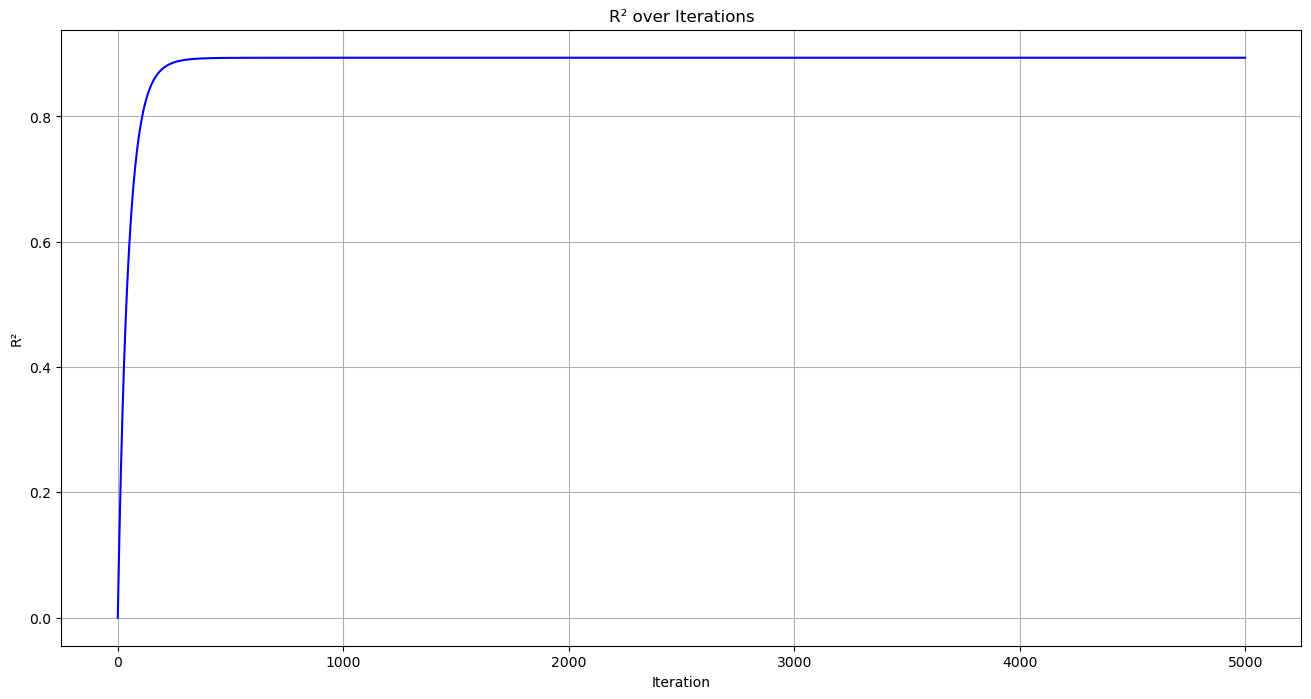

Final weights: [4.36682560e-04 7.37383146e-01 5.36307180e-01 3.14254020e-03]
Final cost (MSE): 0.05133623590933358
Final R²: 0.8936793584593188


In [40]:
# Function to calculate R²
def calculate_r2(y_true, y_pred):
    return r2_score(y_true, y_pred)

# Modified gradient descent function to also calculate R² at each iteration
def grad_descent_with_r2(x, y, learning_rate, num_iterations):
    weights_matrix = initialize_weights()
    costs_matrix = []
    r2_values = []

    for i in range(num_iterations):
        predictions = predict(x, weights_matrix)
        cost = compute_cost(y, predictions)
        costs_matrix.append(cost)
        
        # Calculate and store R²
        r2 = calculate_r2(y, predictions)
        r2_values.append(r2)

        # Compute gradients and update weights
        gradients = compute_gradient(x, y, weights_matrix)
        weights_matrix = update_weights(weights_matrix, learning_rate, gradients)

    return weights_matrix, costs_matrix, r2_values

# Running gradient descent with R² calculations
final_weights, costs, r2_values = grad_descent_with_r2(x_train, y_train, learning_rate, 5000)

# Plotting the R² values over iterations
plt.figure(figsize=(16, 8))
plt.plot(r2_values, color='blue')
plt.title("R² over Iterations")
plt.xlabel("Iteration")
plt.ylabel("R²")
plt.grid(True)
plt.show()

# Output the final results: weights, cost, and R²
print("Final weights:", final_weights)
print("Final cost (MSE):", costs[-1])
print("Final R²:", r2_values[-1])


<function matplotlib.pyplot.show(close=None, block=None)>

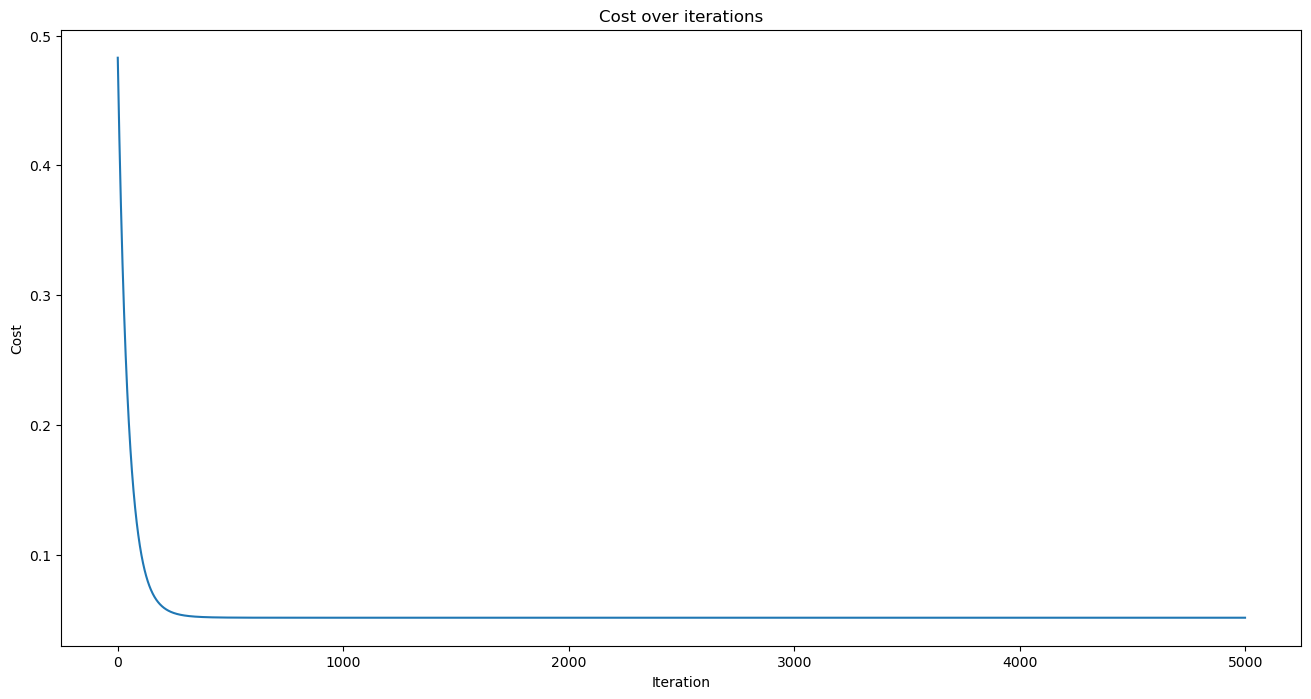

In [41]:
# Plotting the costs
plt.figure(figsize=(16, 8))
plt.plot(costs)
plt.title("Cost over iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show

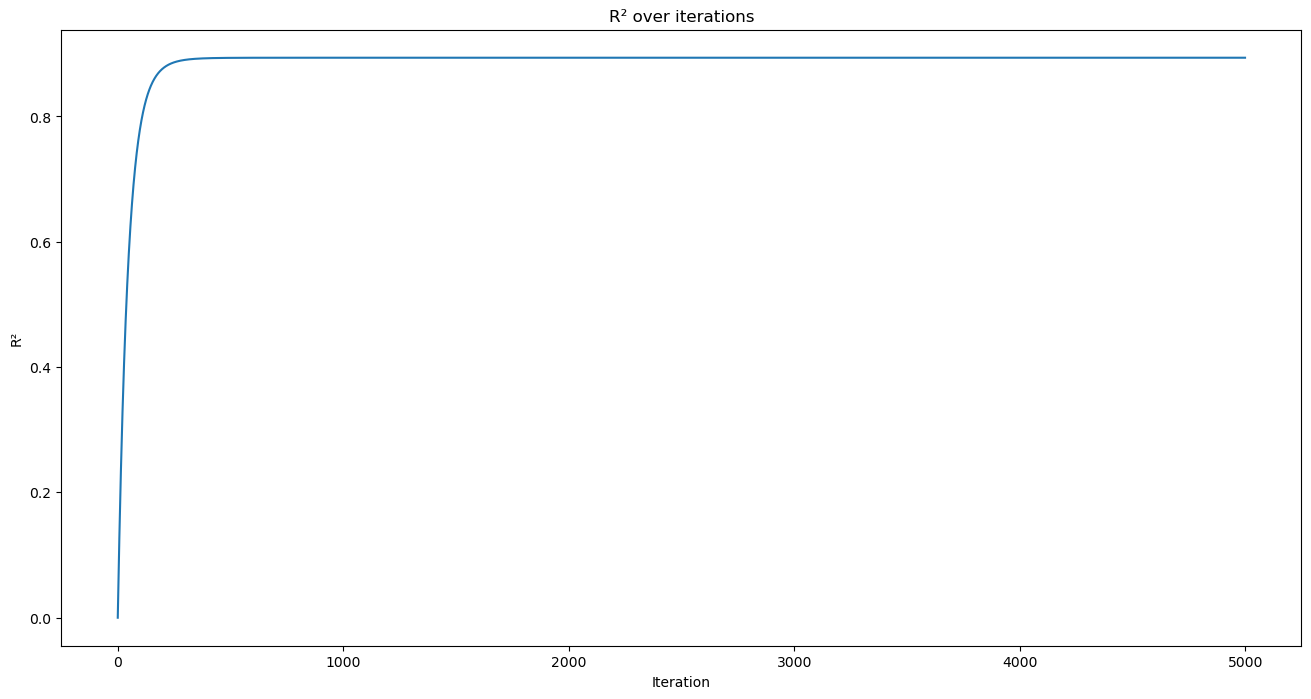

In [42]:
# Plotting r2 values
plt.figure(figsize=(16, 8))
plt.plot(r2_values)
plt.title("R² over iterations")
plt.xlabel("Iteration")
plt.ylabel("R²")
plt.show()

As observed in the plots, the cost (MSE) decreases with increasing iterations, indicating that the model’s predictions are gradually improving and getting closer to the actual values. This suggests that gradient descent optimization effectively minimizes errors. On the other hand, the R² value increases with more iterations, meaning the model is explaining a larger portion of the variance in the target variable (Sales). This is a good indicator of model performance, showing how well the model fits the data. However, the difference between 1000 and 5000 iterations is quite small, suggesting that further iterations do not significantly improve the model's performance.

### Check the effect on the cost and error as you change the learning rate. 

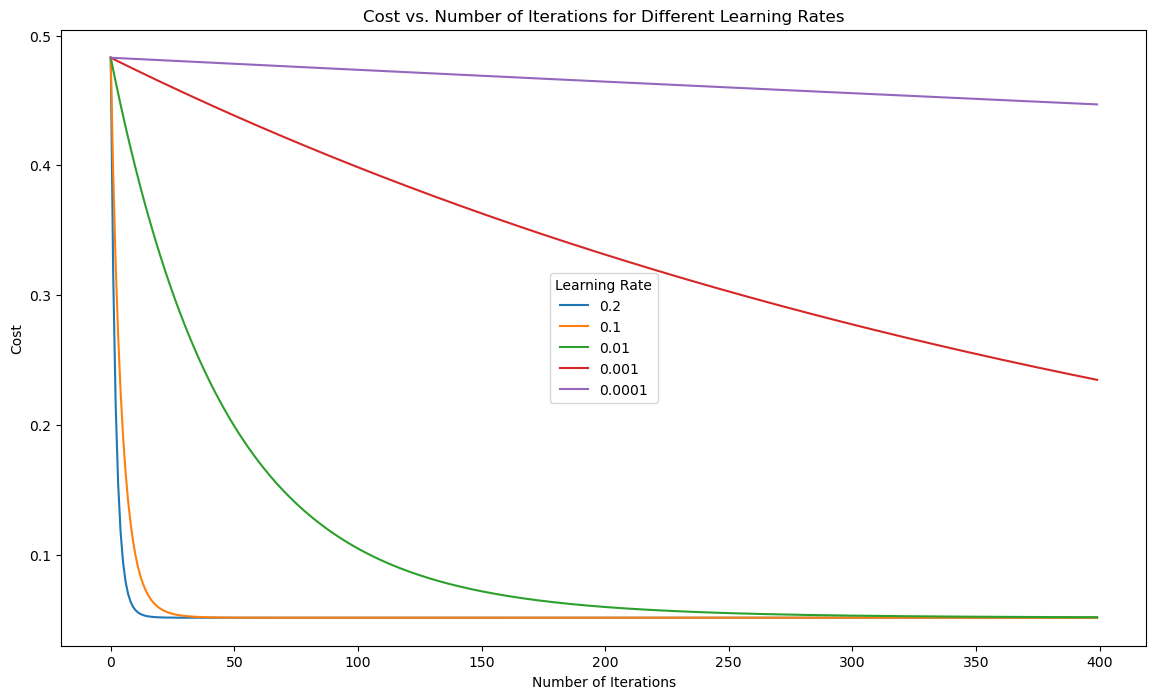

In [45]:
# List of learning rates to try
learning_rates = [0.2, 0.1, 0.01, 0.001, 0.0001]

# Dictionary to store weights and costs for each learning rate
results = {lr: grad_descent(x_train, y_train, lr, 400) for lr in learning_rates}

# Create DataFrame for costs from all learning rates
df_costs = pd.concat([pd.DataFrame(costs, columns=[str(lr)]) for lr, (weights, costs) in results.items()], axis=1)

# Reset index for seaborn
df_costs.reset_index(drop=False, inplace=True)

# Define dimensions for the plot
fig, ax = plt.subplots(figsize=(14, 8))
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")

# Melt DataFrame for seaborn
melted_df = df_costs.melt(id_vars='index', var_name='Learning Rate', value_name='Cost')

# Plot
sns.lineplot(data=melted_df, x='index', y='Cost', hue='Learning Rate', ax=ax)
plt.title("Cost vs. Number of Iterations for Different Learning Rates")
plt.show()


As we can observe from the figure above, choosing an appropriate learning rate is crucial for optimizing the model's performance. Small Learning Rates (e.g., 0.0001, 0.001): When the learning rate is too small, the cost decreases very slowly, indicating that the model is making minimal progress toward minimizing the error. This can result in excessively long training times and a failure to reach an optimal solution within a reasonable number of iterations. High Learning Rates (e.g., 0.1, 0.2): Conversely, when the learning rate is too high, the model shows significant fluctuations in the cost function. This behavior is a result of overshooting the minimum, where the gradient descent algorithm skips over the optimal weights, leading to instability and potentially divergent behavior.

### Is there a relationship on the learning rate and the number of iterations?

A higher learning rate can lead to faster convergence with fewer iterations, but it also increases the risk of overshooting the minimum cost, especially when the number of iterations exceeds the optimal range. A lower learning rate allows for more precise updates and gradual progress toward the minimum cost. However, it requires significantly more iterations, leading to longer training times and greater computational resource demands.g.

### Compare the results with the results of ordinary least squares function.

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define a function to evaluate a model (for both Gradient Descent and OLS)
def evaluate_model(model, x_train, y_train, x_test, y_test, model_name="Model"):
    # Fit the model
    model.fit(x_train, y_train)
    
    # Get predictions for training and testing sets
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Get the weights (intercept and coefficients)
    weights = np.insert(model.coef_, 0, model.intercept_)
    
    # Print the results
    print(f"{model_name} Results:")
    print(f"  Weights: {weights}")
    print(f"  R² score (Train): {r2_train}")
    print(f"  R² score (Test): {r2_test}")
    print("\n")
    
    return r2_train, r2_test, weights

# Compare Gradient Descent and OLS
def compare_models(final_weights, x_train, y_train, x_test, y_test):
    # Prepare Gradient Descent results
    print("Gradient Descent Results:")
    print(f"  Weights: {final_weights}")
    
    # Calculate predictions using final weights (Gradient Descent)
    y_train_pred_gd = predict(x_train, final_weights)
    y_test_pred_gd = predict(x_test, final_weights)
    
    # Calculate R² for Gradient Descent
    r2_train_gd = r2_score(y_train, y_train_pred_gd)
    r2_test_gd = r2_score(y_test, y_test_pred_gd)
    
    print(f"  R² score (Train): {r2_train_gd}")
    print(f"  R² score (Test): {r2_test_gd}")
    print("\n")
    
    # Fit and evaluate OLS model
    ols_model = LinearRegression()
    ols_r2_train, ols_r2_test, ols_weights = evaluate_model(ols_model, x_train, y_train, x_test, y_test, model_name="OLS")

    return r2_train_gd, r2_test_gd, ols_r2_train, ols_r2_test

# Call the function to compare models
compare_models(final_weights, x_train, y_train, x_test, y_test)


Gradient Descent Results:
  Weights: [4.36682560e-04 7.37383146e-01 5.36307180e-01 3.14254020e-03]
  R² score (Train): 0.8936793584593188
  R² score (Test): 0.9110275702091695


OLS Results:
  Weights: [4.36682560e-04 0.00000000e+00 7.37383146e-01 5.36307180e-01
 3.14254020e-03]
  R² score (Train): 0.8936793584593189
  R² score (Test): 0.9110275702091714




(0.8936793584593188,
 0.9110275702091695,
 0.8936793584593189,
 0.9110275702091714)

The weights in both methods align closely, indicating that both approaches converge on the same solution. Both models perform equally well on both the training and testing sets, with the R² values indicating a strong predictive ability and generalization from the training data to the unseen test data.